In [ ]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastgs  # upgrade on colab

# Welcome to fastgs

## Introduction

**This library is currently in _alpha_, neither the functionality nor the API is stable**

This library provides geospatial MSData image support for fastai. FastAI already has extensive support for RGB images in the pipeline. I try to achieve feature parity for multi-spectral images with this library, specifically in the context of Sentinel 2 geospatial imaging.

## Install

```sh
pip install -Uqq fastgs
```

```sh
conda install -c restlessronin fastgs
```

## How to use

The low-level functionality is wrapped into a class that loads sets of Sentinel 2 channels into a multi-spectral tensor (a `TensorImageMS` subclass of `fastai` `TensorImage` which itself is a subclass of the `pytorch` `Tensor`).

In [ ]:
from fastgs.multispectral import *

The following code creates a class that can load 11 Sentinel 2 channels into a `TensorImageMS`.

In [ ]:
from fastgs.vision.testio import * # defines read_multichan_files_as_tensor

sentinel2 = createSentinel2Descriptor()

snt_12 = MSData(
    sentinel2,
    ["B02","B03","B04","B05","B06","B07","B08","B8A","B11","B12","AOT"],
    [sentinel2.rgb_combo["natural_color"], ["B07","B06","B05"],["B12","B11","B8A"],["B08"]],
    get_channel_filenames,
    read_multichan_files
)

The second parameter is a list of 4 channel sets that are minimally required to visualize all the individual channels.

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

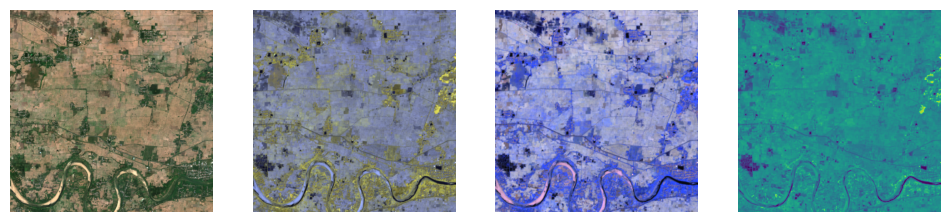

In [ ]:
img_12 = snt_12.load_image(66)
img_12.show()

## Acknowledgements

This library is inspired by the following notebooks (and related works by the authors)

* https://dpird-dma.github.io/blog/MSData-image-classification-Transfer-Learning/
* https://github.com/cordmaur/Fastai2-Medium/blob/master/01_Create_Datablock.ipynb

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()